In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


On va tester la méthode de descente de gradient à pas constant sur la fonction  $$f(x,y)=4x^2+y^2.$$
On définit alors la fonction $f$.

In [5]:
def f(X):
    return 4*X[0]**2+X[1]**2

Pour prendre une idée sur les variation de $f$, on peut tracer des lignes de niveau en utilisant 
la fonction contour(X0,X1,Z,30), où X0 est de type array à une dimension (qui liste les abscisses  x0
des points du maillage), de même pour X1 (pour les ordonnées), et où Z est un tableau de type
array à deux dimensions qui contient les valeurs des  $f(X)$, avec  $X=(x0,x1)$  où  $x0$  parcourt 
la liste des abscisses et  $x1$  parcourt celle des ordonnées. Cela trace  30  lignes de niveau.

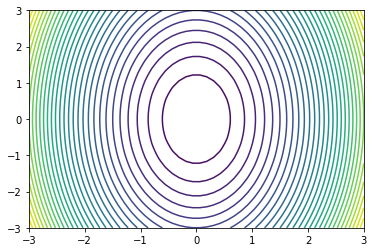

In [7]:
aX0=linspace(-3,3)
aX1=linspace(-3,3)
Z=array([[f([x0,x1]) for x0 in aX0] for x1 in aX1])
contour(aX0,aX1,Z,30)
show()

 On définit  une variable  ε=1e-8  qui correspondra à un paramètre d’approximation pour la formule des différences finies à droite (on n’aura pas besoin de le changer souvent, autant ne pas le mettre comme argument dans les méthodes). On définit ensuite  une fonction qui prend en argument une fonction  f  dont on veut approximer le gradient, un point  X  (sous la forme d’un vecteur) et qui renvoie l’approximation du gradient par différences finies à droite. 

In [9]:
epsilon=1e-8
def gradient(f,x):
    fx=f(x)
    grad=zeros(size(x))
    for i in range(size(x)):
        veps=zeros(size(x))
        veps[i]+=epsilon
        grad[i]=(f(x+veps)-fx)/epsilon
    return grad

On définit une fonction qui prend en argument une fonction  $f$  à minimiser, un point initial  X0 , 
un pas  α , et une tolérance, et qui calcule la suite  Xk  correspondant à la méthode de descente 
de gradient à pas fixe pour  f . On renverra la liste des  Xk . On prendra comme critère d’arrêt 
le fait que la norme du gradient est plus petite que la tolérance. Et on se mettra une limite 
au nombre de passages dans la boucle, au cas où on ne convergerait pas.


In [24]:
def methodePasconstant(f,X0,alpha,tol,N=200):
    l=[X0]
    X=X0
    g=gradient(f,X0)
    n=0
    while norm(g)>tol and n<=N:
        n+=1
        X=X-alpha*g
        g=gradient(f,X)
        l.append(X)
    return l    

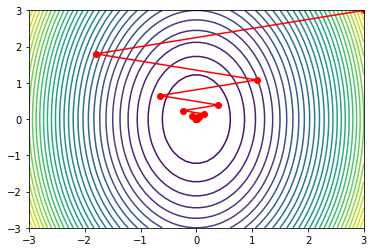

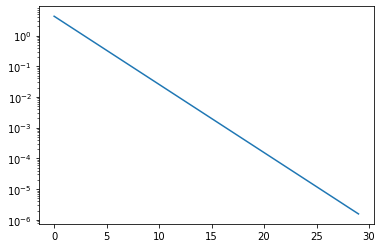

In [26]:
l=methodePasconstant(f,[3,3],.2,1e-5)
lx0=[X[0] for X in l]
lx1=[X[1] for X in l]
aX0=linspace(-3,3)
aX1=linspace(-3,3)
Z=array([[f([x0,x1]) for x0 in aX0] for x1 in aX1])
contour(aX0,aX1,Z,30)
plot(lx0,lx1,'-ro')
show()
semilogy([norm(X) for X in l])
show()


In [23]:
print(l)

None
